# K-Nearest Neighbors (KNN)

## Import Modules

In [59]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# data
from sklearn.datasets import load_iris
# spliting data
from sklearn.model_selection import train_test_split
# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# evaluation
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [11]:
data = load_iris()

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
# load data into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualizing the Data

In [37]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

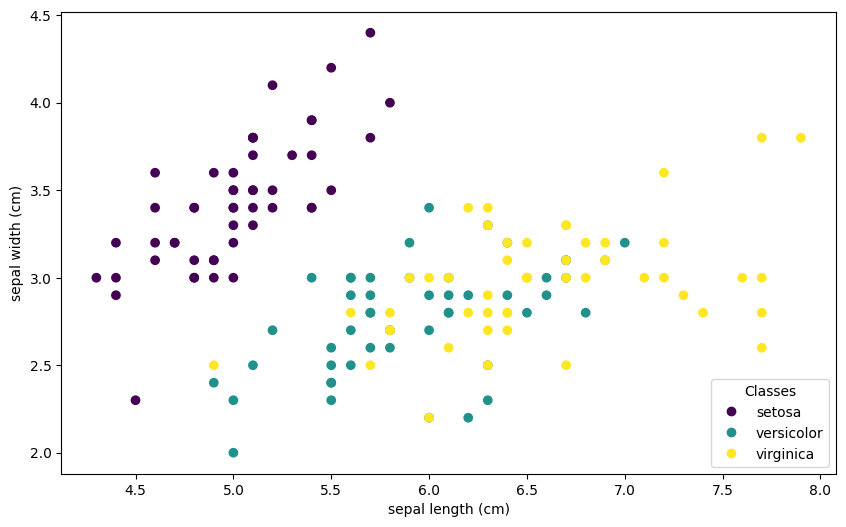

In [34]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

handles, labels = scatter.legend_elements(prop='colors')
legend_labels = data.target_names
plt.legend(handles, legend_labels, loc='lower right', title='Classes')
plt.show()


AttributeError: 'Axes' object has no attribute 'legend_elements'

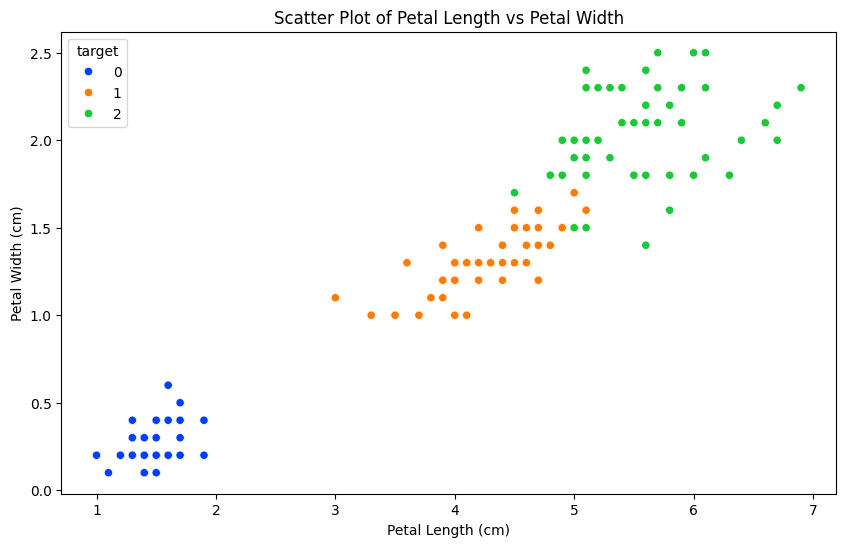

In [ ]:
# Scatter plot for petal length and petal width
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=df, palette='bright')
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
handles, labels = scatter.legend_elements(prop='colors')
legend_labels = data.target_names
plt.legend(handles, legend_labels, loc='lower right', title='Classes')
plt.legend(title="Species")
plt.show()

## Splitting the Data

In [49]:
X = df.drop('target', axis=1)
y = df['target']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## Creating and Training the Model

In [52]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Evaluating the Model

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Conclusion

The model performed perfectly on the test data:

- Accuracy, Precision, Recall, and F1-Score are all 100% for each class, meaning every instance was classified correctly.
- The confusion matrix shows no misclassifications, with all predicted values matching the true classes exactly.
In short, the KNN model did an excellent job on this dataset, with no errors in classification. However, if this high performance is consistent across other datasets, it may indicate possible overfitting.